In [1]:
from __future__ import annotations

import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from gemdat import Trajectory, plots
from gemdat.io import load_known_material

# Select the trajectory
#trajectory = Trajectory.from_vasprun(Path('tests/data/short_simulation/vasprun_long.xml'))
trajectory = Trajectory.from_vasprun(
    Path('tests/data/short_simulation/vasprun.xml'))
print('Loading ok', flush=True)
type_to_select = 'Li'
diff_trajectory = trajectory.filter(type_to_select)

# Load the structure
structure = load_known_material('argyrodite', supercell=(2, 1, 1))

Loading ok


In [2]:
%matplotlib widget

# Resolution is the minimum size of the voxels in Angstrom
from gemdat.volume import trajectory_to_volume

diff_volume = trajectory_to_volume(diff_trajectory, resolution=0.2)

# density plot also represents the energy
from gemdat import Trajectory

plots.density(diff_volume, structure, as_probability=False)

F = diff_volume.get_free_energy(kBT=trajectory.metadata['temperature'])
# Notice that there are points where it is numerically impossible to find moble atoms
# so the free energy is Inf and it can cause numerical instabilities

/home/simone/Dropbox/eScience_projects/GEMDAT/src/gemdat/volume.py:298: RuntimeWarning:

divide by zero encountered in log



In [3]:
# Select a start and and end point to get the path

# (option 1) Manually select start and end points
start_point = tuple(0, 10, 5)
end_point = tuple(7, 3, 2)

# (option 2) Consider as candidates all the sites where F is smaller than Fmax
Fmax = 1e6
indices = np.where(F < Fmax)
candidates = list(zip(*indices))
start_point = random.choice(candidates)
end_point = random.choice(candidates)

# (option 3) Select two peaks
peaks = diff_volume.find_peaks()
start_point = tuple(random.choice(peaks))
end_point = tuple(random.choice(peaks))

print(f'Path from {start_point} to {end_point}')

Path from (60, 26, 33) to (30, 22, 37)


In [4]:
# Calculate the path between two points
from gemdat.transitions import dijkstra_path, direct_path

path, path_energy = dijkstra_path(F,
                                  start_point,
                                  end_point,
                                  max_energy_threshold=1e10)
print('Dijkstra path: ', path)
if path is not None:
    print("Total Energy Required:", sum(path_energy))

dpath, dpath_energy = direct_path(F, start_point, end_point)
print('Direct path: ', dpath)
if dpath is not None:
    print("Total Energy Required:", sum(dpath_energy))

Dijkstra path:  [(60, 26, 33), (59, 25, 33), (58, 24, 32), (57, 23, 31), (56, 23, 32), (55, 22, 32), (55, 21, 32), (54, 20, 31), (54, 19, 31), (53, 18, 31), (52, 17, 31), (51, 16, 31), (50, 15, 31), (49, 14, 31), (48, 14, 30), (47, 15, 30), (46, 16, 31), (45, 17, 32), (44, 18, 32), (44, 19, 32), (43, 20, 32), (42, 21, 32), (41, 22, 33), (40, 22, 34), (39, 22, 35), (38, 22, 36), (37, 22, 37), (36, 22, 38), (35, 22, 38), (34, 22, 39), (33, 23, 39), (32, 23, 38), (31, 22, 37), (30, 22, 37)]
Total Energy Required: 217548.06184844347
Direct path:  [(60, 26, 33), (59, 25, 34), (58, 24, 35), (57, 23, 36), (56, 22, 37), (55, 22, 37), (54, 22, 37), (53, 22, 37), (52, 22, 37), (51, 22, 37), (50, 22, 37), (49, 22, 37), (48, 22, 37), (47, 22, 37), (46, 22, 37), (45, 22, 37), (44, 22, 37), (43, 22, 37), (42, 22, 37), (41, 22, 37), (40, 22, 37), (39, 22, 37), (38, 22, 37), (37, 22, 37), (36, 22, 37), (35, 22, 37), (34, 22, 37), (33, 22, 37), (32, 22, 37), (31, 22, 37), (30, 22, 37)]
Total Energy Req

/tmp/ipykernel_42464/2369886120.py:13: RuntimeWarning:

overflow encountered in scalar add



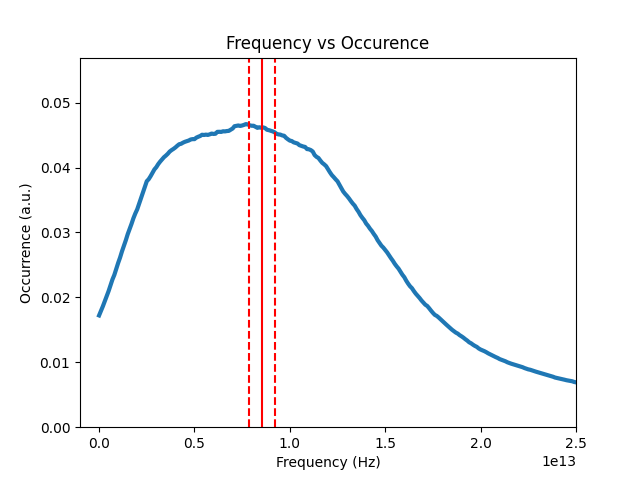

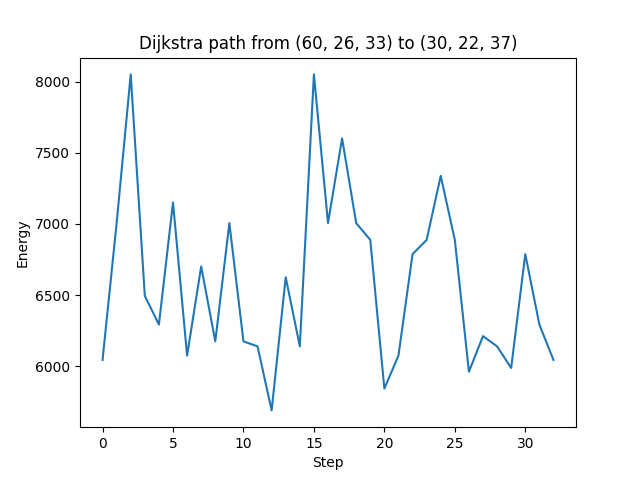

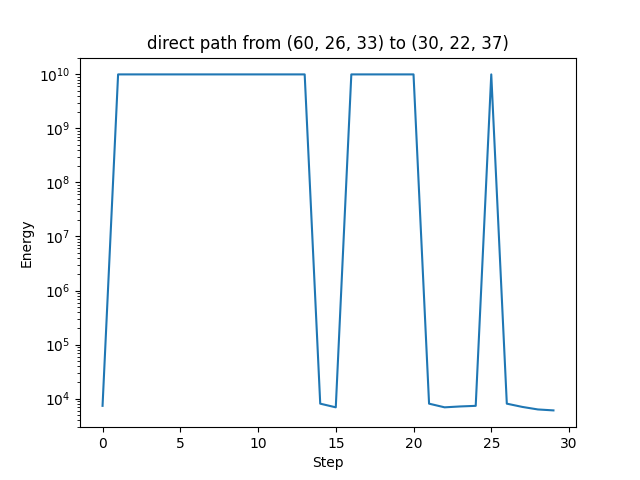

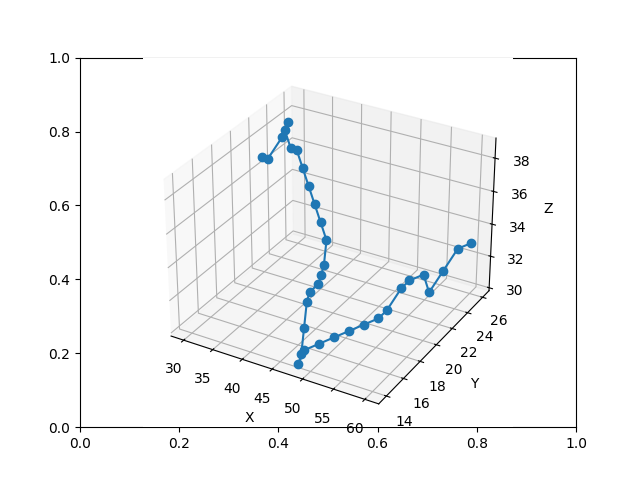

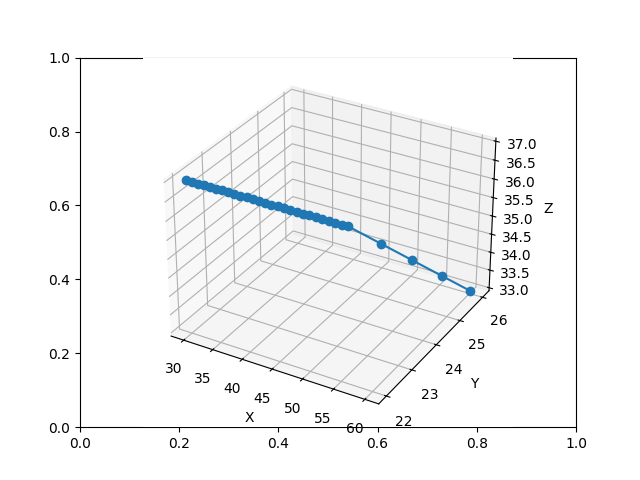

In [5]:
if path is not None:
    plots.energy_along_path(energy_path=path_energy)
    plt.title(f'Dijkstra path from {start_point} to {end_point}')

    plots.energy_along_path(energy_path=np.clip(dpath_energy, 0, 1e10))
    plt.title(f'direct path from {start_point} to {end_point}')
    plt.yscale('log')

    plots.path_on_grid(path=path)

    plots.path_on_grid(path=dpath)

else:
    print("No path found.")